# Minor Task (Binary Image CAC Optimization using GA)

- Youssef George Fouad Saad - 19p9824

A Genetic algorithm to find the optimal constant area coding (CAC).
- Fitness function f(x) = compression ration = n1/n2 
- n1 is the original size
- n2 is the compressed size

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from PIL import Image
import os

## Read Image

Random Image: device5-6.gif


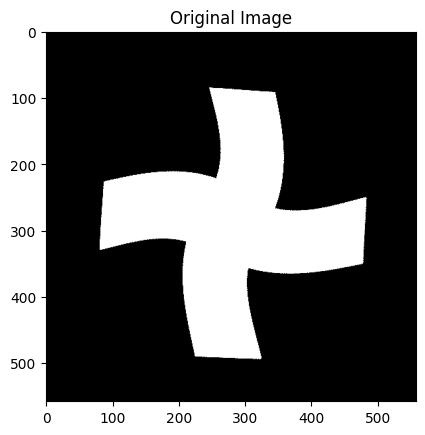

In [2]:
# Step 1: Read random image
images = os.listdir('Dataset') # List all images in the folder
random_image = np.random.choice(images) # Randomly select an image
print('Random Image:', random_image)

img = Image.open('Dataset/' + random_image).convert('1') # Open the image and convert it to binary
img = np.array(img)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.show()

## Define Genetic Algorithms Parameters

- Encode possible block heights, widths
- Chromosome length = log_2(possible block heights count) + log_2(possible block widths count)
- Possible chromosomes count = possible block heights count * possible block widths count
- Population count = 10% * possible chromosomes count

In [3]:
image_height, image_width = img.shape

possible_block_heights = getDivisors(image_height)
possible_block_widths = getDivisors(image_width)

possible_solutions_count = len(possible_block_heights) * len(possible_block_widths)
population_size = int(0.1 * possible_solutions_count)
population_size = population_size if population_size % 2 == 0 else population_size + 1
population_size = max(population_size, 4)

block_height_chromosome_length = int(np.ceil(np.log2(len(possible_block_heights))))
block_width_chromosome_length = int(np.ceil(np.log2(len(possible_block_widths))))

In [4]:
print("Image size: ", image_height, "x", image_width)
print(f"Possible block heights ({len(possible_block_heights)}):  {possible_block_heights}")
print(f"Possible block widths ({len(possible_block_widths)}):  {possible_block_widths}")
print("Possible solutions count (combinations): ", possible_solutions_count)
print("Population size (10% of the possible solutions to the nearest even number): ", population_size)

print(f"Chromosome length for block height: {block_height_chromosome_length}")
print(f"Chromosome length for block width: {block_width_chromosome_length}")
print(f"Total chromosome length: {block_height_chromosome_length + block_width_chromosome_length} bits [{' x'*(block_height_chromosome_length+block_width_chromosome_length)} ]")

Image size:  558 x 558
Possible block heights (12):  [1, 2, 3, 6, 9, 18, 31, 62, 93, 186, 279, 558]
Possible block widths (12):  [1, 2, 3, 6, 9, 18, 31, 62, 93, 186, 279, 558]
Possible solutions count (combinations):  144
Population size (10% of the possible solutions to the nearest even number):  14
Chromosome length for block height: 4
Chromosome length for block width: 4
Total chromosome length: 8 bits [ x x x x x x x x ]


In [5]:
NUM_GENERATIONS = 100
best_fitness_values = []
best_fitness_value = -1
best_block_sizes = []

# Step 1: Generate the initial population
population = generatePopulation(population_size, block_height_chromosome_length, block_width_chromosome_length, possible_block_heights, possible_block_widths)
new_population = population

for i in range(NUM_GENERATIONS+1):
    # Step 2: Evaluate the fitness of the population
    fitness_values = evaluatePopulation(new_population, img, block_height_chromosome_length, block_width_chromosome_length, possible_block_heights, possible_block_widths)
    
    # Step 3: Select the top half of the population
    top_half_population = selectSurvivors(new_population, fitness_values)
    
    # Step 4: Match parents couples
    parents_tuples = matchParents(top_half_population)
    
    # Step 5: Generate offsprings by applying crossover and mutation
    new_population = generateOffsprings(parents_tuples, block_height_chromosome_length, block_width_chromosome_length)
    
    
    if fitness_values[0] == 0:
        print("Failed to find the solution as the fitness value is 0")
        break
    
    fitness_values.sort(reverse=True)
    if i % 10 == 0:
        print(f"Generation {i}: Best fitness value: {fitness_values[0]}")
        
    best_fitness_values.append(fitness_values[0])
    if fitness_values[0] > best_fitness_value:
        best_fitness_value = fitness_values[0]
        best_chromosome = top_half_population[0]
    height_index = binaryToDecimal(best_chromosome[block_width_chromosome_length:])
    width_index = binaryToDecimal(best_chromosome[:block_width_chromosome_length])
    best_block_size = [possible_block_heights[height_index], possible_block_widths[width_index]]
    best_block_sizes.append(best_block_size)
        
print(f"Best fitness value: {best_fitness_value}")

Generation 0: Best fitness value: 12.685434915461398
Generation 10: Best fitness value: 12.685434915461398
Generation 20: Best fitness value: 15.960018453021682
Generation 30: Best fitness value: 15.960018453021682
Generation 40: Best fitness value: 16.00925497454882
Generation 50: Best fitness value: 16.00925497454882
Generation 60: Best fitness value: 16.00925497454882
Generation 70: Best fitness value: 16.00925497454882
Generation 80: Best fitness value: 16.00925497454882
Generation 90: Best fitness value: 16.00925497454882
Generation 100: Best fitness value: 16.00925497454882
Best fitness value: 16.00925497454882


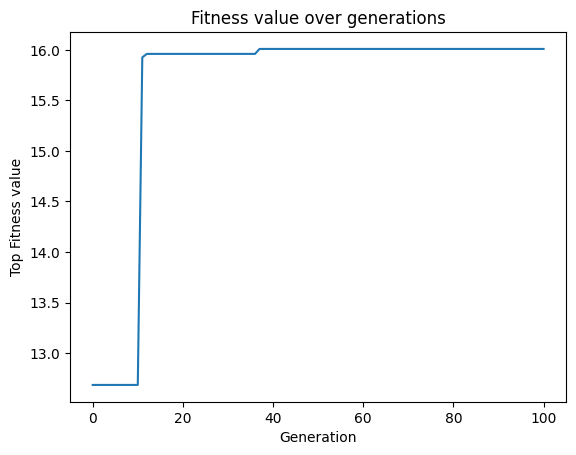

In [6]:
plt.plot(best_fitness_values)
plt.xlabel('Generation')
plt.ylabel('Top Fitness value')
plt.title('Fitness value over generations')
plt.show()

Best block size: [9, 6]


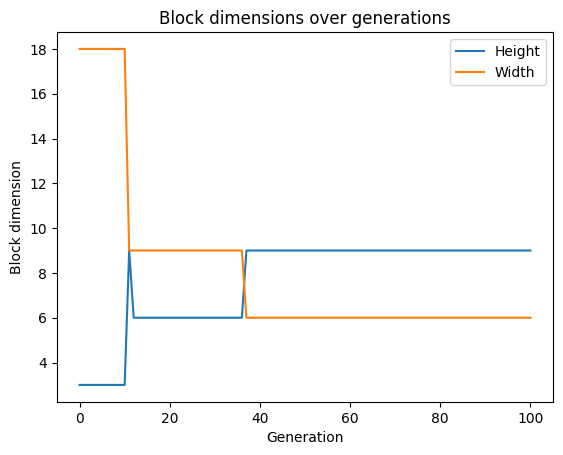

In [7]:
print(f"Best block size: {best_block_size}")

plt.plot(best_block_sizes)
plt.xlabel('Generation')
plt.ylabel('Block dimension')
plt.title('Block dimensions over generations')
plt.legend(['Height', 'Width'])
plt.show()